<a href="https://colab.research.google.com/github/Angular97/Diabetes-Prediction-Using-KNN-Algorithm_From_Scratch/blob/main/Diabetes_Prediction_Using_KNN_Algorithm_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import sklearn as sl
import pandas as pd
import statistics
import matplotlib.pyplot as plt


**Supervised Problem:**

* The problem in which we are given a dataset which has target/dependent/labelled variable.
* Here we know for what we are building the model

**Classification Problem:**

* The problem where dataset contains categorical target variable.

**Creating K-Nearest Neighbors Class From Scratch**

In [84]:
class KNN_Classifier():

  # initiating the parameters
  def __init__(self, distance_metric):

    self.distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metric(self,training_data_point, test_data_point):

    if (self.distance_metric == 'euclidean'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)
    
      return euclidean_dist

    elif (self.distance_metric == 'manhattan'):

      dist = 0

      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist

      return manhattan_dist

  # getting the nearest neighbors
  def nearest_neighbors(self,X_train, test_data, k):

    distance_list = []

    for training_data in X_train:

      distance = self.get_distance_metric(training_data, test_data)  # Now we dis cal. kr rha h b/w train & test
      distance_list.append((training_data, distance))    # yah pr 2d array pr train data k corresponding distance store kari h , because easily sort the distance & find nearest neighbour based on  small distance 

    distance_list.sort(key=lambda x: x[1])  # yah pr distance ko sort kara h  2D Matrix

    neighbors_list = []

    for j in range(k):     # we only need k point sort distance
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  # predict the class of the new data point:
  def predict(self,X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)
    
    for data in neighbors:
      label = []
      label.append(data[-1])    # [-1] target is last col. means taking last column i.e outcome

    predicted_val = statistics.mode(label)

    return predicted_val


**KNN**

* K Nearest Neighbours
* Uses similarity measure ( how much two objects are alike)
* Stores available cases and for finding label for new case, check in it's  v   neighbor, and says that I am one of them.
* Applications
 1. Recommended System (E Commerce Websites)
 2. Concept Search (Internet generates plethora of documents each day, to segeregate them we may use this algorithm)

**My Implementation**

* Algorithm
1. Find the distance between new_data_instance and all existing instances
2. Find nearest K points.
3. Among them choose which target class occurred in majority.

**Catch**
1. Choose approaprite value for K

**Steps**
1. Define Distance Metric Function (Euclidian & Manhattan)
2. Define NearestNeigbours Function
3. Define Predict Function


* X_train --> training data with features and target

* X_test  --> test data without target 
* K: K neighbors



**Now with Help of Above Algo. We are going to Predict Whether a Patient Have a Diabetes or Not**

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
 # loading the diabetes dataset to a pandas DataFrame

 diabetes_dataset=pd.read_csv('/content/diabetes.csv')

In [87]:
# printing the first 5 rows of the dataset

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
# number of rows and Columns in this dataset

diabetes_dataset.shape

(768, 9)

In [89]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


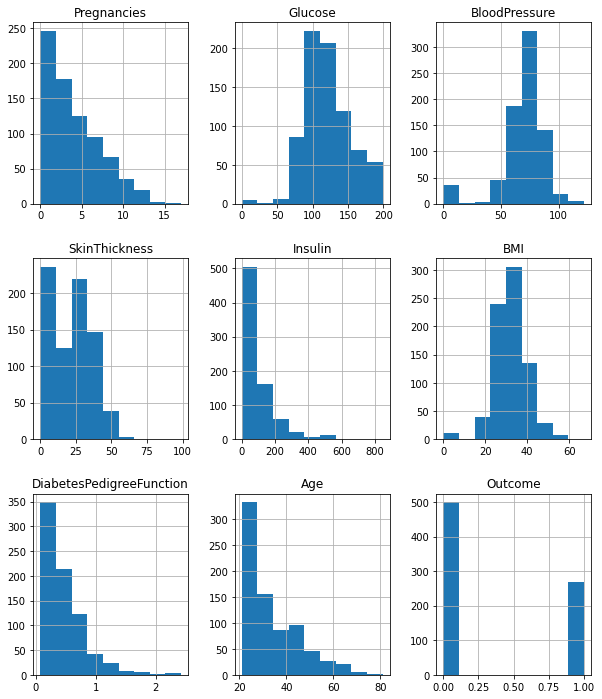

In [90]:
diabetes_dataset.hist(bins=9,figsize=(10,12))
plt.show()

**Flow of Working To Predict This Dataset**
1. Define Distance Metric Function (Euclidian & Manhattan)
2. Define NearestNeigbours Function
3. Define Predict Function

* X_train --> training data with features and target

* X_test  --> test data without target 
* K: K neighbors


In [91]:
#separating Features and Target

X = diabetes_dataset.drop(columns='Outcome' , axis = 1)
Y = diabetes_dataset['Outcome']

In [92]:
# Convert data into  Numpy Array

X=X.to_numpy()
Y=Y.to_numpy()

print(X)
print(Y)


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [93]:
# train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [94]:
print(X.shape , X_train.shape , X_test.shape)

(768, 8) (614, 8) (154, 8)


In [95]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 3.24e+01 1.41e-01 2.40e+01]
 [6.00e+00 1.05e+02 7.00e+01 ... 3.08e+01 1.22e-01 3.70e+01]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.01e+01 3.98e-01 5.90e+01]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [4.00e+00 1.12e+02 7.80e+01 ... 3.94e+01 2.36e-01 3.80e+01]
 [0.00e+00 8.60e+01 6.80e+01 ... 3.58e+01 2.38e-01 2.50e+01]]


In [96]:
# Now Adding Outcome data With X_train Data so Model predict well with X_test data

X_train = np.insert(X_train,8,Y_train , axis=1)

In [97]:
print(X_train.shape)

(614, 9)


In [98]:
print(X_train[:,8])   #printing syntax last column

[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.

In [99]:
classification = KNN_Classifier(distance_metric='manhattan')

In [100]:
Prediction = classification.predict(X_train , X_test[2] , k=5)

In [101]:
print(X_test[2] , Y_test[2] , Prediction)

[  5.    147.     78.      0.      0.     33.7     0.218  65.   ] 0 0.0


In [102]:
X_test.shape

(154, 8)

In [103]:
X_test_size=X_test.shape[0]
print(X_test_size)

154


In [104]:
Final_Predict = []

for i in range(X_test_size):
  Prediction = classification.predict(X_train,X_test[i] , k=5)
  Final_Predict.append(Prediction)

In [105]:
print(Final_Predict)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]


**Model Evaluation**

In [106]:
Accuracy = accuracy_score(Y_test,Final_Predict)
print(Accuracy*100,"%")

74.02597402597402 %


**Implement Same Model With SK Learn**

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
A = diabetes_dataset.drop(columns='Outcome', axis = 1)
B = diabetes_dataset['Outcome']

In [109]:
# train test split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, stratify=B, random_state=2)

In [110]:
print(A.shape, A_train.shape, A_test.shape)

(768, 8) (614, 8) (154, 8)


In [111]:
KNN=KNeighborsClassifier(p=1)    # p=1 means mannhattan distance & p=2 means ecudliean & n_neibhour means k value


In [112]:
KNN.fit(A_train , B_train)

KNeighborsClassifier(p=1)

In [113]:
Predict_Value = KNN.predict(A_test)

In [114]:
accuracy = accuracy_score(B_test, Predict_Value)
print(accuracy*100 , "%")

77.92207792207793 %


**Conclusion**
* As you can see that in our own bulid model give **74% Accuracy** while when we used SKLearn KNN Model , it give **77.9% Accuracy** , so compaaring result with both model our own build model give Quit good Accuracy :) .

* For small datasets, good as a baseline, easy to explain.